In [1]:
import pandas as pd
df=pd.read_csv('questions.csv')

In [2]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df.shape

(404351, 6)

In [4]:
new_df=df.sample(30000)

In [5]:
new_df.shape

(30000, 6)

<Axes: xlabel='is_duplicate'>

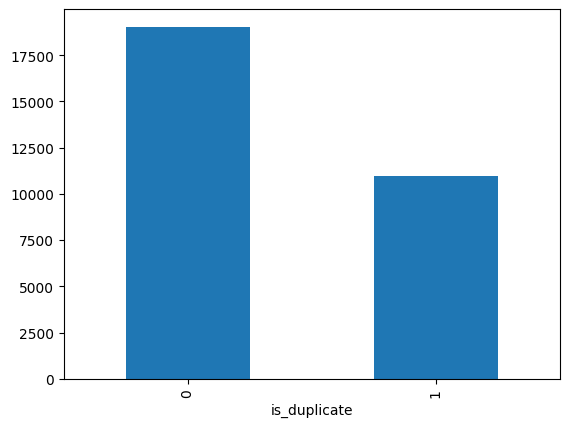

In [6]:
new_df['is_duplicate'].value_counts().plot(kind="bar")

In [7]:
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())

In [8]:
qid.shape

(60000,)

In [9]:
len(qid.unique())

59843

In [10]:
sum(qid.value_counts()>1)

140

In [11]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
new_df.duplicated().sum()

0

<Axes: xlabel='is_duplicate'>

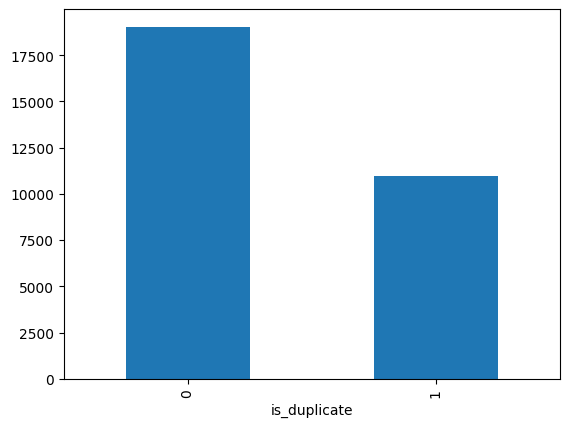

In [13]:
new_df['is_duplicate'].value_counts().plot(kind="bar")

In [14]:
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print("Total no of Questions :",qid.shape[0])

Total no of Questions : 60000


In [15]:
print("Total No of unique Questions :",len(qid.unique()))

Total No of unique Questions : 59843


In [16]:
print("Total Repeated Questions :",sum(qid.value_counts()>1))

Total Repeated Questions : 140


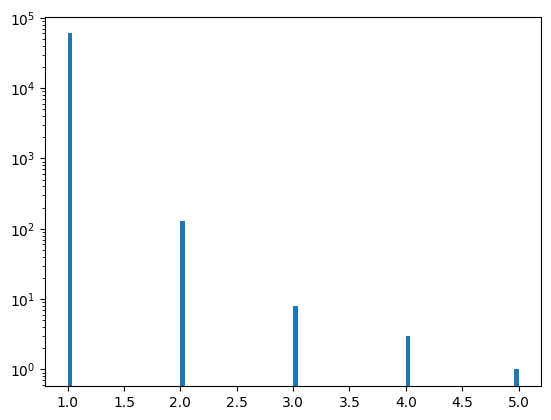

In [17]:
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')

## Feature Engineering

In [18]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [19]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
400330,400330,782093,782094,How much time does it take for a loan to be di...,Why does the SBI take much more time to provid...,0,54,95
209399,209399,413054,413055,Is B.tech IT from VSSUT Burla is good?,How is VSSUT Burla IT department for B.TECH?,1,38,44
380922,380922,744988,744989,What does a script look like?,What's a script?,0,29,16
373887,373887,731529,731530,What is a good book on human behaviour?,What are great books on human behaviour and ps...,0,39,55
132256,132256,261946,261947,How do I recover my Gmail password?,How do I recover a forgotten Gmail password?,1,35,44


In [20]:
new_df['q1_num_words']=new_df['question1'].apply(lambda x:len(x.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda x:len(x.split(" ")))

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
400330,400330,782093,782094,How much time does it take for a loan to be di...,Why does the SBI take much more time to provid...,0,54,95,12,18
209399,209399,413054,413055,Is B.tech IT from VSSUT Burla is good?,How is VSSUT Burla IT department for B.TECH?,1,38,44,8,8
380922,380922,744988,744989,What does a script look like?,What's a script?,0,29,16,6,3
373887,373887,731529,731530,What is a good book on human behaviour?,What are great books on human behaviour and ps...,0,39,55,8,9
132256,132256,261946,261947,How do I recover my Gmail password?,How do I recover a forgotten Gmail password?,1,35,44,7,8


In [22]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))

    return len(w1&  w2)

In [23]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [24]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
400330,400330,782093,782094,How much time does it take for a loan to be di...,Why does the SBI take much more time to provid...,0,54,95,12,18,5
209399,209399,413054,413055,Is B.tech IT from VSSUT Burla is good?,How is VSSUT Burla IT department for B.TECH?,1,38,44,8,8,4
380922,380922,744988,744989,What does a script look like?,What's a script?,0,29,16,6,3,1
373887,373887,731529,731530,What is a good book on human behaviour?,What are great books on human behaviour and ps...,0,39,55,8,9,3
132256,132256,261946,261947,How do I recover my Gmail password?,How do I recover a forgotten Gmail password?,1,35,44,7,8,6


In [25]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))

    return (len(w1)+len(w2))

In [26]:
new_df['word_total']=new_df.apply(total_words,axis=1)

In [27]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
400330,400330,782093,782094,How much time does it take for a loan to be di...,Why does the SBI take much more time to provid...,0,54,95,12,18,5,30
209399,209399,413054,413055,Is B.tech IT from VSSUT Burla is good?,How is VSSUT Burla IT department for B.TECH?,1,38,44,8,8,4,15
380922,380922,744988,744989,What does a script look like?,What's a script?,0,29,16,6,3,1,9
373887,373887,731529,731530,What is a good book on human behaviour?,What are great books on human behaviour and ps...,0,39,55,8,9,3,17
132256,132256,261946,261947,How do I recover my Gmail password?,How do I recover a forgotten Gmail password?,1,35,44,7,8,6,15


In [28]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)

In [29]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
400330,400330,782093,782094,How much time does it take for a loan to be di...,Why does the SBI take much more time to provid...,0,54,95,12,18,5,30,0.17
209399,209399,413054,413055,Is B.tech IT from VSSUT Burla is good?,How is VSSUT Burla IT department for B.TECH?,1,38,44,8,8,4,15,0.27
380922,380922,744988,744989,What does a script look like?,What's a script?,0,29,16,6,3,1,9,0.11
373887,373887,731529,731530,What is a good book on human behaviour?,What are great books on human behaviour and ps...,0,39,55,8,9,3,17,0.18
132256,132256,261946,261947,How do I recover my Gmail password?,How do I recover a forgotten Gmail password?,1,35,44,7,8,6,15,0.40


In [30]:
new_df.describe()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,203027.408267,393725.082533,391662.585000,0.365133,59.296633,60.028100,10.898300,11.179967,4.517167,21.091633,0.223871
std,116461.093553,227922.549293,228390.945396,0.481476,29.705628,33.115056,5.397616,6.158245,3.110739,8.538446,0.128755
min,16.000000,33.000000,34.000000,0.000000,1.000000,10.000000,1.000000,2.000000,0.000000,5.000000,0.000000
25%,102362.250000,195919.000000,193090.000000,0.000000,39.000000,39.000000,7.000000,7.000000,2.000000,15.000000,0.120000
50%,203595.000000,393718.000000,390571.500000,0.000000,51.000000,51.000000,10.000000,10.000000,4.000000,19.000000,0.220000
75%,304200.000000,591621.750000,589845.000000,1.000000,71.000000,71.000000,13.000000,13.000000,6.000000,25.000000,0.320000
max,404312.000000,789724.000000,789725.000000,1.000000,332.000000,484.000000,64.000000,107.000000,33.000000,94.000000,0.500000


## Visualization

/tmp/ipykernel_26702/1422560087.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q1_len'])


Minimum : 1
Minimum : 332
Minimum : 59.29663333333333


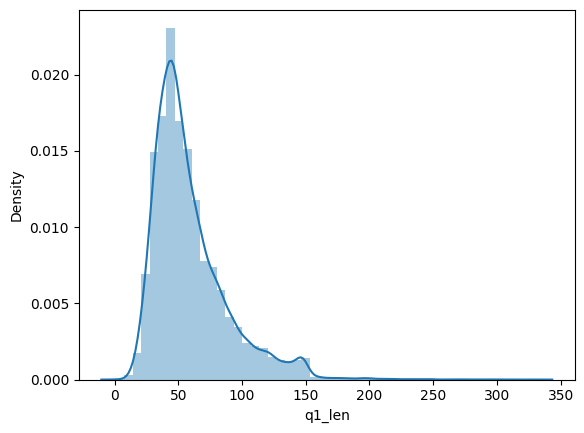

In [31]:
import seaborn as sns
sns.distplot(new_df['q1_len'])
print("Minimum :",new_df['q1_len'].min())
print("Minimum :",new_df['q1_len'].max())
print("Minimum :",new_df['q1_len'].mean())
plt.show()

/tmp/ipykernel_26702/282335722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['q1_len'])
/tmp/ipykernel_26702/282335722.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['q1_len'])


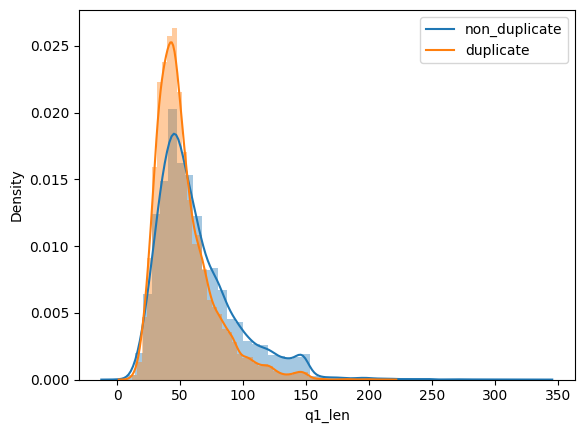

In [32]:
sns.distplot(new_df[new_df['is_duplicate']==0]['q1_len'])
sns.distplot(new_df[new_df['is_duplicate']==1]['q1_len'])
plt.legend(['non_duplicate','duplicate'])

/tmp/ipykernel_26702/3747779340.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q2_len'])


Minimum : 10
Minimum : 484
Minimum : 60.0281


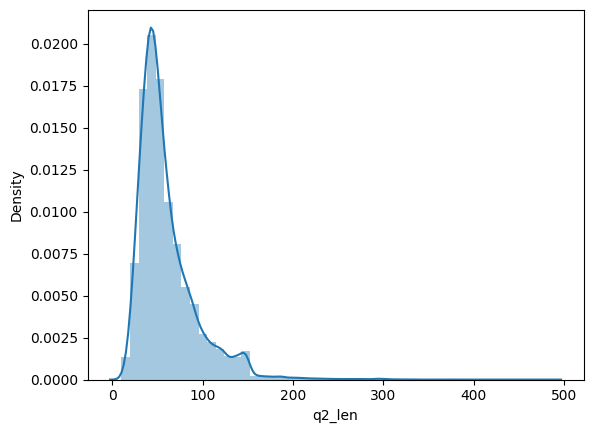

In [33]:
import seaborn as sns
sns.distplot(new_df['q2_len'])
print("Minimum :",new_df['q2_len'].min())
print("Minimum :",new_df['q2_len'].max())
print("Minimum :",new_df['q2_len'].mean())
plt.show()

/tmp/ipykernel_26702/1060185486.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['q2_len'])
/tmp/ipykernel_26702/1060185486.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['q2_len'])


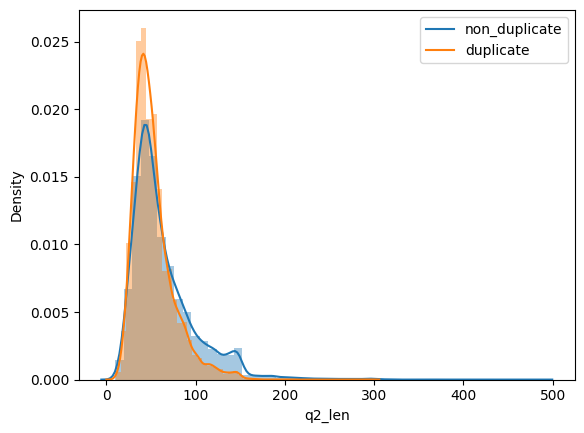

In [34]:
sns.distplot(new_df[new_df['is_duplicate']==0]['q2_len'])
sns.distplot(new_df[new_df['is_duplicate']==1]['q2_len'])
plt.legend(['non_duplicate','duplicate'])

/tmp/ipykernel_26702/2015743619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q1_num_words'])


Minimum : 1
Minimum : 64
Minimum : 10.8983


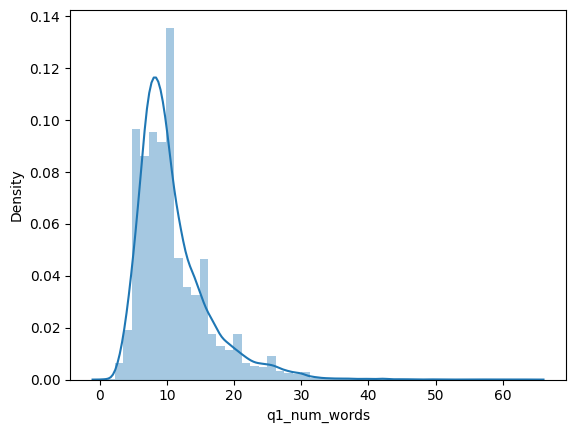

In [35]:
import seaborn as sns
sns.distplot(new_df['q1_num_words'])
print("Minimum :",new_df['q1_num_words'].min())
print("Minimum :",new_df['q1_num_words'].max())
print("Minimum :",new_df['q1_num_words'].mean())
plt.show()

/tmp/ipykernel_26702/2936841384.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['q1_num_words'])
/tmp/ipykernel_26702/2936841384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['q1_num_words'])


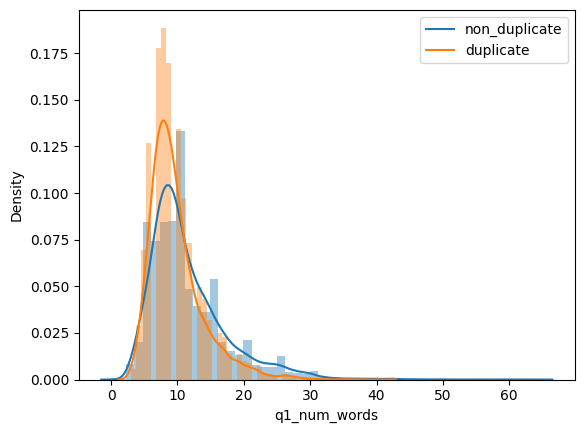

In [36]:
sns.distplot(new_df[new_df['is_duplicate']==0]['q1_num_words'])
sns.distplot(new_df[new_df['is_duplicate']==1]['q1_num_words'])
plt.legend(['non_duplicate','duplicate'])

/tmp/ipykernel_26702/2803604729.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q2_num_words'])


Minimum : 2
Minimum : 107
Minimum : 11.179966666666667


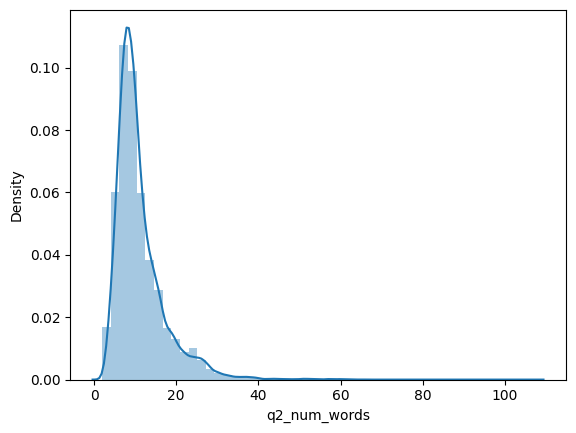

In [37]:
import seaborn as sns
sns.distplot(new_df['q2_num_words'])
print("Minimum :",new_df['q2_num_words'].min())
print("Minimum :",new_df['q2_num_words'].max())
print("Minimum :",new_df['q2_num_words'].mean())
plt.show()

/tmp/ipykernel_26702/1384635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'])
/tmp/ipykernel_26702/1384635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'])


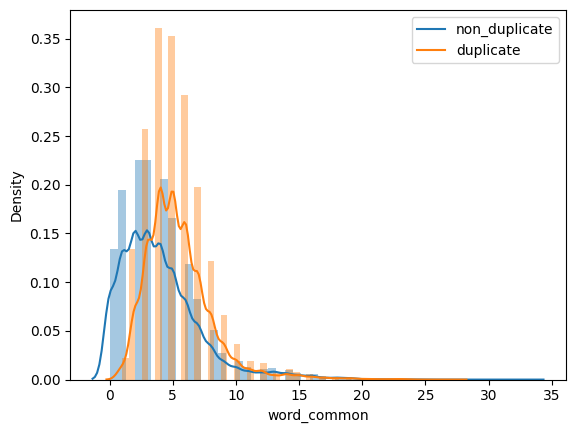

In [38]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'])
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'])
plt.legend(['non_duplicate','duplicate'])

/tmp/ipykernel_26702/2889879878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'])
/tmp/ipykernel_26702/2889879878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'])


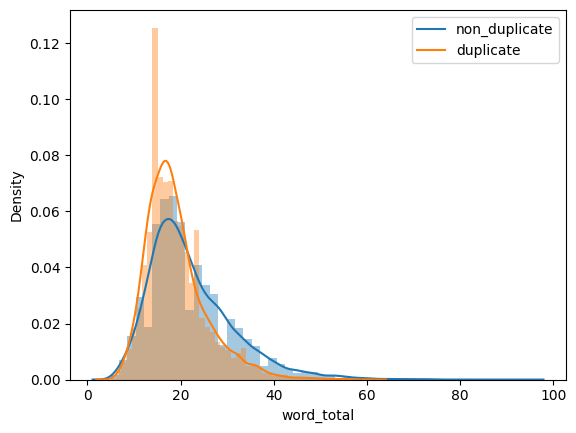

In [39]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'])
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'])
plt.legend(['non_duplicate','duplicate'])

/tmp/ipykernel_26702/36208816.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'])
/tmp/ipykernel_26702/36208816.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'])


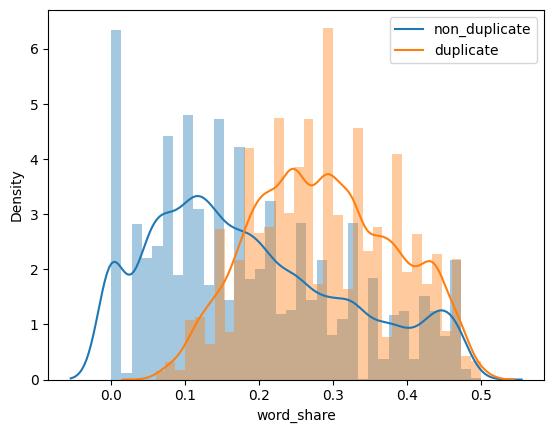

In [40]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'])
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'])
plt.legend(['non_duplicate','duplicate'])

## Vectorization

In [41]:
ques_df=new_df[['question1','question2']]

In [42]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])

In [43]:
ques_df.head()

,question1,question2
400330,How much time does it take for a loan to be di...,Why does the SBI take much more time to provid...
209399,Is B.tech IT from VSSUT Burla is good?,How is VSSUT Burla IT department for B.TECH?
380922,What does a script look like?,What's a script?
373887,What is a good book on human behaviour?,What are great books on human behaviour and ps...
132256,How do I recover my Gmail password?,How do I recover a forgotten Gmail password?


In [44]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
400330,0,54,95,12,18,5,30,0.17
209399,1,38,44,8,8,4,15,0.27
380922,0,29,16,6,3,1,9,0.11
373887,0,39,55,8,9,3,17,0.18
132256,1,35,44,7,8,6,15,0.40


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
questions=list(ques_df['question1'])+list(ques_df['question2'])

In [47]:
cv=CountVectorizer(max_features=3000)

In [48]:
import numpy as np
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [49]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [50]:
final_df=pd.concat([final_df,temp_df],axis=1)

In [51]:
final_df.shape

(30000, 6008)

In [52]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
400330,0,54,95,12,18,5,30,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
209399,1,38,44,8,8,4,15,0.27,0,0,...,0,0,0,0,0,0,0,0,0,0
380922,0,29,16,6,3,1,9,0.11,0,0,...,0,0,0,0,0,0,0,0,0,0
373887,0,39,55,8,9,3,17,0.18,0,0,...,0,0,0,0,0,0,0,0,0,0
132256,1,35,44,7,8,6,15,0.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
X_train.shape

(24000, 6007)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 105907 to 157499
Columns: 6007 entries, q1_len to 2999
dtypes: float64(1), int64(6006)
memory usage: 1.1 GB


In [58]:
y_train.shape

(24000,)

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [60]:
X_train.columns = X_train.columns.astype(str)

In [61]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
X_test.columns = X_test.columns.astype(str)

In [63]:
y_pred=clf.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7731666666666667